Importing all dependencies 

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Activation, Dense,Reshape, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM,Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import TextVectorization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.style.use(["science","grid","notebook"])

Reading the data using pandas csv 

In [79]:
data=pd.read_csv("semeval-2017-train.csv",on_bad_lines="skip")
data

,label\ttext
0,1\tOne Night like In Vegas I make dat Nigga Fa...
1,1\tWalking through Chelsea at this time of day...
2,-1\tlooking at the temp outside....hpw did it ...
3,-1\tI'm stuck in London again... :( I don't wa...
4,1\tIt's 2.32 a.m. here in Italy now :) Tomorro...
...,...
35827,1\tRT @jcpatrick101: So.... this evening I hel...
35828,1\tToday *very* rare day when Democrats will g...
35829,1\tRT @StevenTDennis: Today *very* rare day wh...
35830,-1\t@charliemax Democrats will quickly implode...


Extracting the state of mood from the sentence

In [80]:
data["Mood"] = data["label\ttext"].apply(lambda x: x.split(' ')[0].split()[0])
data["Mood"] = data["Mood"].apply(lambda x:int(x))
data.rename(columns = {'label\ttext':'text'}, inplace = True)
data

,text,Mood
0,1\tOne Night like In Vegas I make dat Nigga Fa...,1
1,1\tWalking through Chelsea at this time of day...,1
2,-1\tlooking at the temp outside....hpw did it ...,-1
3,-1\tI'm stuck in London again... :( I don't wa...,-1
4,1\tIt's 2.32 a.m. here in Italy now :) Tomorro...,1
...,...,...
35827,1\tRT @jcpatrick101: So.... this evening I hel...,1
35828,1\tToday *very* rare day when Democrats will g...,1
35829,1\tRT @StevenTDennis: Today *very* rare day wh...,1
35830,-1\t@charliemax Democrats will quickly implode...,-1


In [81]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35832 entries, 0 to 35831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    35832 non-null  object
 1   Mood    35832 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ KB


#### Using neatext package to clean text

In [82]:
import neattext.functions as fnx 
data['text']=data['text'].apply(fnx.remove_special_characters)
data['text']=data['text'].apply(fnx.remove_hashtags)
data['text']=data['text'].apply(fnx.remove_html_tags)
data['text']=data["text"].apply(fnx.remove_stopwords)
data['text']

0                   1One Night like Vegas dat Nigga Famous
1        1Walking Chelsea time day lovely Love London n...
2        1looking temp outsidehpw hotter sun goes Feel ...
3        1Im stuck London dont wanna spend night McDonalds
4        1Its 232 Italy Tomorrow amazing photos Night h...
                               ...                        
35827    1RT jcpatrick101 evening held AdamF81s Nokia N...
35828    1Today rare day Democrats healthier Club Growt...
35829    1RT StevenTDennis Today rare day Democrats hea...
35830    1charliemax Democrats quickly implode concede ...
35831    1Once Democrats spent night morning trying tal...
Name: text, Length: 35832, dtype: object

In [83]:
data

,text,Mood
0,1One Night like Vegas dat Nigga Famous,1
1,1Walking Chelsea time day lovely Love London n...,1
2,1looking temp outsidehpw hotter sun goes Feel ...,-1
3,1Im stuck London dont wanna spend night McDonalds,-1
4,1Its 232 Italy Tomorrow amazing photos Night h...,1
...,...,...
35827,1RT jcpatrick101 evening held AdamF81s Nokia N...,1
35828,1Today rare day Democrats healthier Club Growt...,1
35829,1RT StevenTDennis Today rare day Democrats hea...,1
35830,1charliemax Democrats quickly implode concede ...,-1


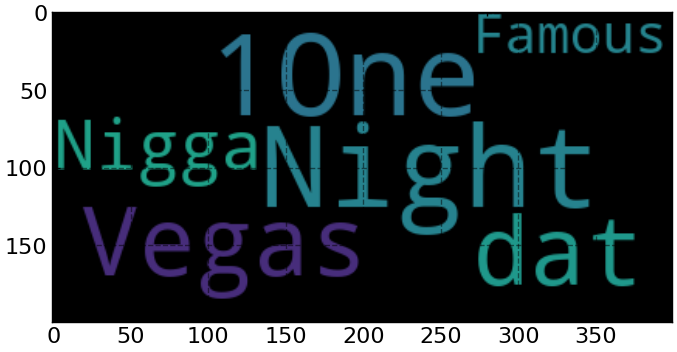

In [85]:
text = data["text"][0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [86]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2824043 words in the combination of all review.


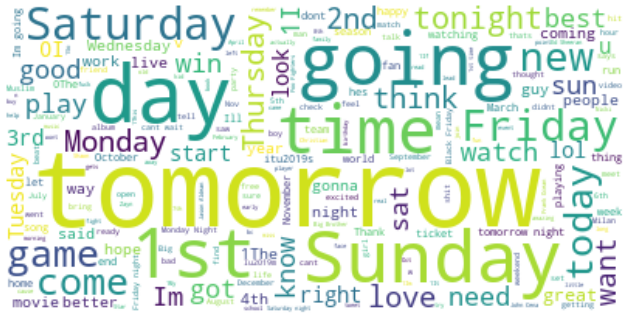

In [87]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

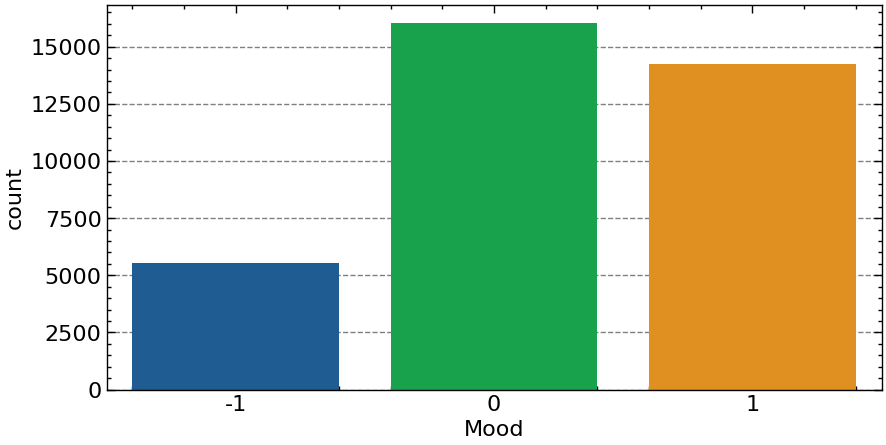

In [9]:
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.countplot(x="Mood",data=data)
plt.show()

#### Text to vector using TextVectrization

In [12]:
X = data['text']
y = data["Mood"].values
MAX_FEATURES = 2000 # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=32,
                               output_mode='int')
vectorizer.adapt(X.values)
text = vectorizer(X.values).numpy()
text

array([[1747,    5,    7, ...,    0,    0,    0],
       [   1,  393,   10, ...,    0,    0,    0],
       [1078,    1,    1, ...,    0,    0,    0],
       ...,
       [ 579,    1,   25, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0],
       [   1,    1, 1178, ...,    0,    0,    0]], dtype=int64)

#### Text to text vector using tokenization 

In [13]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X_data= tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X_data)
X

array([[   0,    0,    0, ..., 1042, 1222, 1835],
       [   0,    0,    0, ...,   27,  390,    4],
       [   0,    0,    0, ...,    6,   10, 1042],
       ...,
       [   0,    0,    0, ...,   24,    2,  279],
       [   0,    0,    0, ...,  221,  914,  332],
       [   0,    0,    0, ...,  235, 1463,  154]])

#### CNN-LSTM MODEL

In [26]:
embed_dim = 32
lstm_out = 196
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = 21))
model.add(Conv1D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,activation='tanh')))
model.add(tf.keras.layers.Flatten())
model.add(Dense(3,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 21, 32)            64000     
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 10, 32)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 10, 32)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 392)              359072    
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 392)              

In [27]:
Y = pd.get_dummies(data['Mood']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28665, 21) (28665, 3)
(7167, 21) (7167, 3)


In [28]:
batch_size = 128
history=model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
224/224 [==============================] - 30s 104ms/step - loss: 0.5331 - accuracy: 0.5679
Epoch 2/15
224/224 [==============================] - 23s 101ms/step - loss: 0.4047 - accuracy: 0.7024
Epoch 3/15
224/224 [==============================] - 22s 100ms/step - loss: 0.3675 - accuracy: 0.7363
Epoch 4/15
224/224 [==============================] - 22s 100ms/step - loss: 0.3473 - accuracy: 0.7543
Epoch 5/15
224/224 [==============================] - 23s 103ms/step - loss: 0.3336 - accuracy: 0.7696
Epoch 6/15
224/224 [==============================] - 23s 104ms/step - loss: 0.3158 - accuracy: 0.7843
Epoch 7/15
224/224 [==============================] - 23s 101ms/step - loss: 0.2970 - accuracy: 0.7998
Epoch 8/15
224/224 [==============================] - 22s 100ms/step - loss: 0.2789 - accuracy: 0.8121
Epoch 9/15
224/224 [==============================] - 22s 100ms/step - loss: 0.2630 - accuracy: 0.8264
Epoch 10/15
224/224 [==============================] - 22s 100ms/step - l

In [29]:
model.evaluate(X_train,Y_train)

896/896 [==============================] - 9s 10ms/step - loss: 0.1193 - accuracy: 0.9414


[0.11930295825004578, 0.9414268136024475]

In [72]:
twt = ["I love you so much will you marry me!! "]
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=21, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)
print(np.argmax(sentiment))
print(sentiment)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27]]
1/1 - 0s - 26ms/epoch - 26ms/step
2
[[0.02940694 0.0231591  0.95923996]]


#### LSTM-CNN MODEL

In [62]:
model1 = Sequential()
model1.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model1.add(Bidirectional(LSTM(196, dropout=0.2, recurrent_dropout=0.2,activation='tanh')))
model1.add(Reshape((392,1)))
model1.add(Conv1D(filters=150, kernel_size=5, activation='relu', padding='causal'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Dropout(0.7))
model1.add(tf.keras.layers.Flatten())
model1.add(Dense(3, activation='sigmoid'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 21, 32)            64000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 392)              359072    
 nal)                                                            
                                                                 
 reshape_2 (Reshape)         (None, 392, 1)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 392, 150)          900       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 196, 150)         0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 196, 150)         

In [64]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [65]:
batch_size = 32
model1.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
896/896 [==============================] - 166s 178ms/step - loss: 0.4863 - accuracy: 0.6246
Epoch 2/15
896/896 [==============================] - 156s 174ms/step - loss: 0.3850 - accuracy: 0.7202
Epoch 3/15
896/896 [==============================] - 154s 172ms/step - loss: 0.3641 - accuracy: 0.7383
Epoch 4/15
896/896 [==============================] - 151s 168ms/step - loss: 0.3534 - accuracy: 0.7484
Epoch 5/15
896/896 [==============================] - 150s 167ms/step - loss: 0.3411 - accuracy: 0.7568
Epoch 6/15
896/896 [==============================] - 161s 180ms/step - loss: 0.3298 - accuracy: 0.7642
Epoch 7/15
896/896 [==============================] - 153s 171ms/step - loss: 0.3182 - accuracy: 0.7752
Epoch 8/15
896/896 [==============================] - 160s 178ms/step - loss: 0.3059 - accuracy: 0.7850
Epoch 9/15
896/896 [==============================] - 158s 176ms/step - loss: 0.2970 - accuracy: 0.7901
Epoch 10/15
896/896 [==============================] - 154s 172m

In [66]:
model1.evaluate(X_train,Y_train)

896/896 [==============================] - 30s 33ms/step - loss: 0.1902 - accuracy: 0.8756


[0.19015613198280334, 0.8755625486373901]

In [67]:
model1.predict(X_test)

224/224 [==============================] - 7s 29ms/step


array([[4.5123927e-02, 7.7343023e-01, 2.0806527e-01],
       [3.8765862e-09, 1.0000000e+00, 2.1174678e-08],
       [1.7885104e-01, 7.4736355e-03, 7.8102487e-01],
       ...,
       [5.9922751e-02, 3.6746338e-02, 9.1044724e-01],
       [5.6430817e-08, 9.9999994e-01, 7.5056292e-08],
       [3.2003246e-02, 6.6310704e-01, 3.2165053e-01]], dtype=float32)

In [73]:
twt = ['He is theif,he killed my wife']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=21, dtype='int32', value=0)
print(twt)
sentiment = model1.predict(twt,batch_size=1,verbose = 2)
print(np.argmax(sentiment))
print(sentiment)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  715 1178]]
1/1 - 0s - 34ms/epoch - 34ms/step
0
[[0.897325   0.0432208  0.03905714]]


#### Conclusion

In [69]:
print("Both the models are doing very well with nearly same accuracy of 89 ,but lstm-cnn is classifiying better than cnn-lstm")

Both the models are doing very well with nearly same accuracy of 89 ,but lstm-cnn is classifiying better than cnn-lstm
